In [4]:
# Clone the Tensorflow Model Garden and installing the object detection packages
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3176, done.
remote: Counting objects: 100% (3176/3176), done.
remote: Compressing objects: 100% (2514/2514), done.
remote: Total 3176 (delta 845), reused 1489 (delta 616), pack-reused 0
Receiving objects: 100% (3176/3176), 33.38 MiB | 23.82 MiB/s, done.
Resolving deltas: 100% (845/845), done.


In [5]:
# Installing the object detection packages
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comput



  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires foliu

In [6]:
# import library
from PIL import Image
from urllib.request import urlopen
import numpy as np
import tensorflow_hub as hub
from matplotlib import pyplot as plt
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util

In [7]:
def img2numpy(img_path):
  # Open the image from its path
  img = Image.open(urlopen(img_path))
  # Convert image to numpy array with shape (H, W, 3)
  image_array = np.array(img)
  # Convert the numppy array to the shape (1, H, W, 3)
  img_numpy= np.expand_dims(image_array,0)  

  return img_numpy

# Display image from its numpy array
def display_img(numpy_array):
  plt.figure(figsize=(24,30))
  plt.imshow(numpy_array)
  plt.show()

Image data shape:  (1, 1406, 2048, 3)


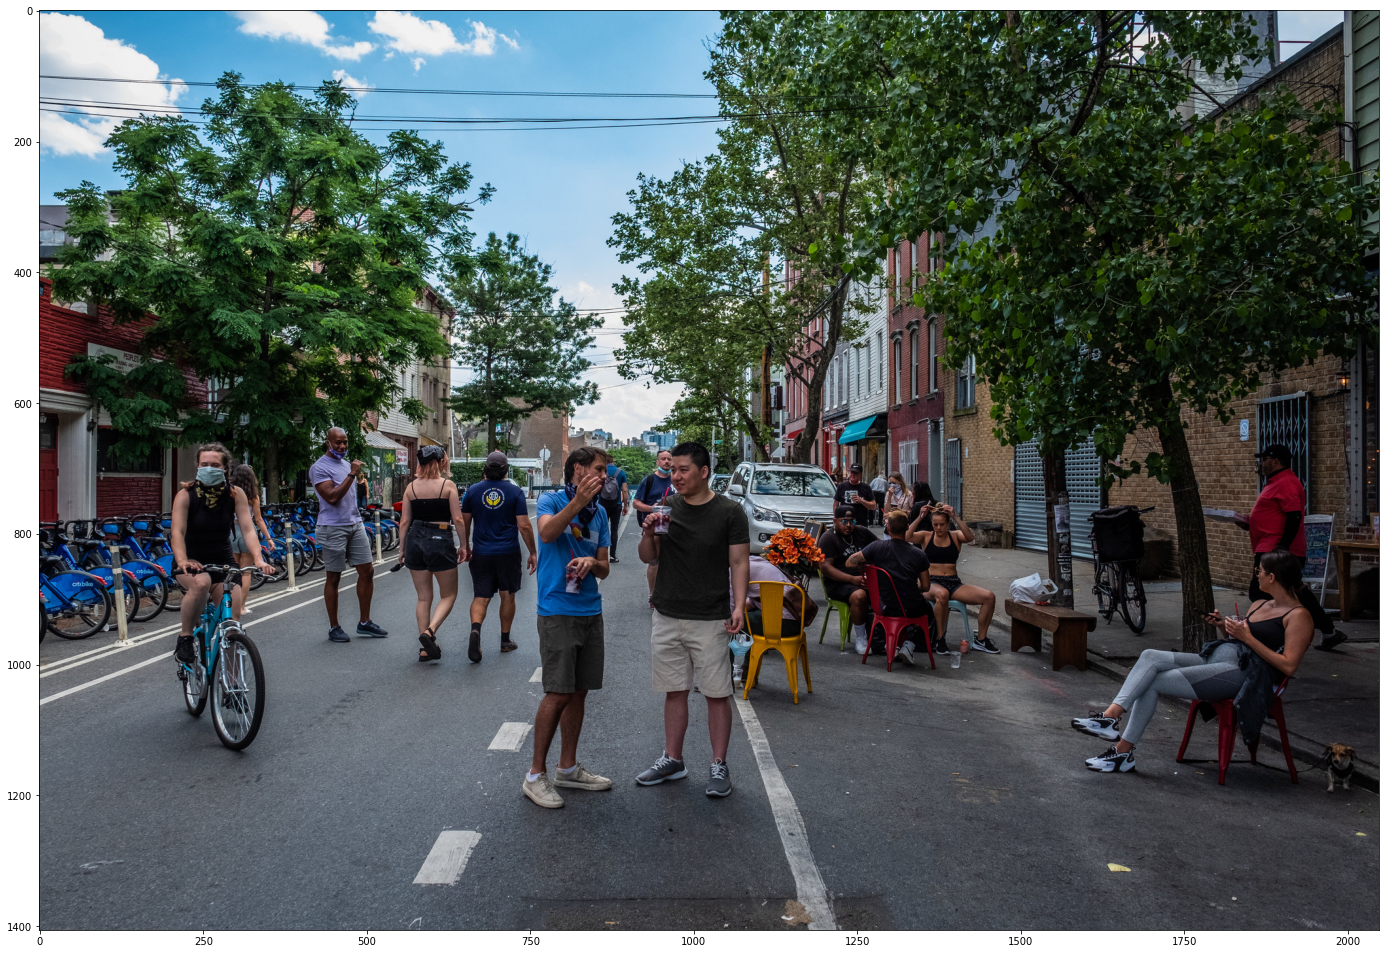

In [54]:
# Using the function to read and display image
%matplotlib inline
img_path= 'https://static01.nyt.com/images/2020/06/22/opinion/20gillisWeb/merlin_173526783_192e498a-5699-411c-b1e5-64fa738eec17-superJumbo.jpg'
img_numpy = img2numpy(img_path)
print('Image data shape: ', img_numpy.shape)
display_img(img_numpy[0])

In [9]:
# Load object detection model from Tensorflow Hub
object_detector = hub.load("https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1")

In [10]:
# Using loaded model to detect image
detector_output = object_detector(img_numpy)

In [11]:
# Example of detector_output
print(detector_output.keys())
print('Detection boxes:', detector_output['detection_boxes'].shape)
print('Detection classes:', detector_output['detection_classes'].shape)
print('Detection scores:', detector_output['detection_scores'].shape)
print('Detection classes:', detector_output['detection_classes'][0].numpy().astype(int))
print('Detection scores:', detector_output['detection_scores'][0].numpy())

dict_keys(['rpn_features_to_crop', 'rpn_box_encodings', 'final_anchors', 'anchors', 'detection_scores', 'detection_boxes', 'refined_box_encodings', 'rpn_objectness_predictions_with_background', 'proposal_boxes', 'raw_detection_scores', 'detection_anchor_indices', 'box_classifier_features', 'detection_classes', 'image_shape', 'num_proposals', 'mask_predictions', 'rpn_box_predictor_features', 'class_predictions_with_background', 'num_detections', 'raw_detection_boxes', 'detection_masks', 'detection_multiclass_scores', 'proposal_boxes_normalized'])
Detection boxes: (1, 100, 4)
Detection classes: (1, 100)
Detection scores: (1, 100)
Detection classes: [ 1  1  1  1  1  2  1  1  1  1 62  1  3  2  1 62 62  1  2  1  2  2  2 62
 31  1  1 62 64 27  1  1  1  1  2  1 62  4 62  1  1  1  4 15  2 27  1 62
  1  4  2  1  8 15 62 62 15  1 62 62 62  2  2  1 64  1 31 31 15 62  1  1
 15 31  3 31  4 27 62 62 62  1  1 27  1 27  1 62 62 62 15 15 62 31 31  4
 62  1  4 15]
Detection scores: [0.99746704 0.996506 

In [12]:
# Map class label name with its id
label_path = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(label_path, use_display_name=True)
print('Category index:', category_index)

Category index: {1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {

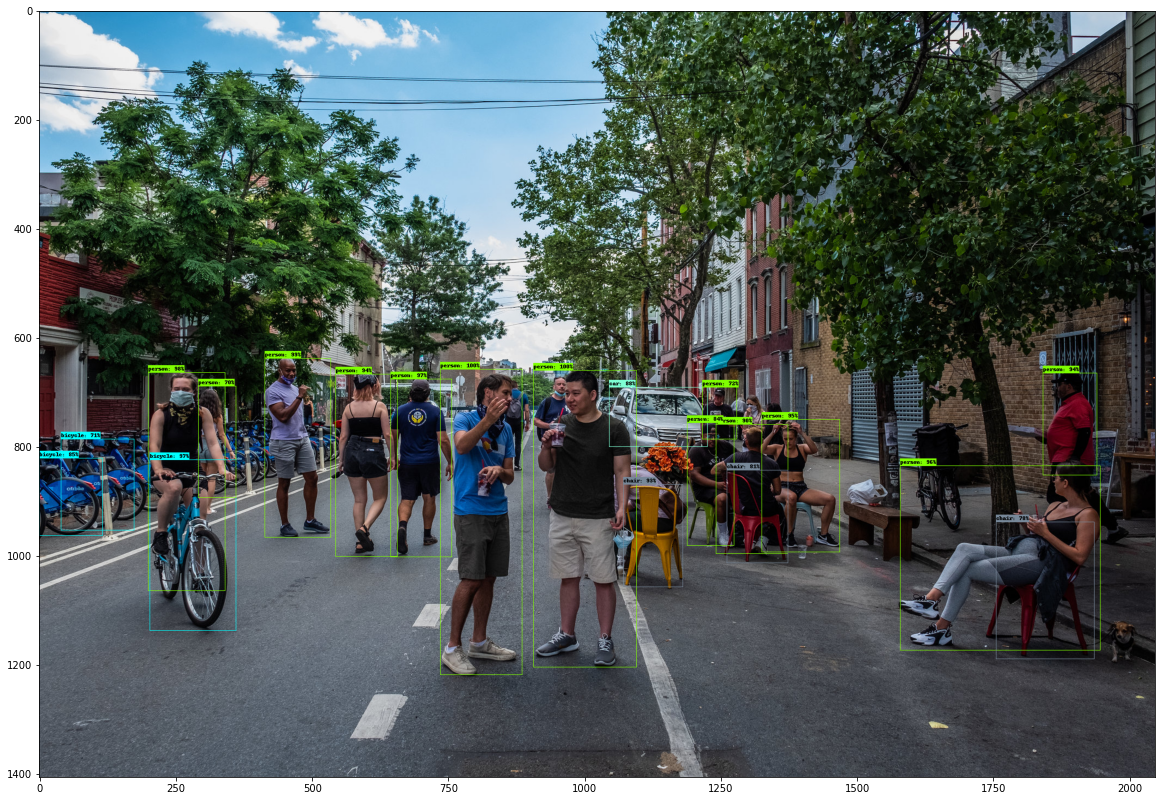

In [51]:
# overlay bounding boxes and its label on the image
viz_utils.visualize_boxes_and_labels_on_image_array(
      img_numpy[0],
      detector_output['detection_boxes'][0].numpy(),
      detector_output['detection_classes'][0].numpy().astype(int),
      detector_output['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=100,
      min_score_thresh=.70,
      agnostic_mode=False,
      line_thickness=1)

# Display the image
plt.figure(figsize=(20,20))
plt.imshow(img_numpy[0])
plt.show()

In [47]:
# Using Mask-RCNN for Instance Segmentation
import tensorflow as tf
from object_detection.utils import ops as utils_ops

# Get the detection_masks and detection_boxes from model output
detection_masks = detector_output['detection_masks'][0]
detection_boxes = detector_output['detection_boxes'][0]
print('Detection masks shape: ', detection_masks.shape)

# Reframe the the bounding box mask to the image size.
detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(detection_masks, detection_boxes, img_numpy.shape[1], img_numpy.shape[2])
print('Detection masks shape after reframing: ', detection_masks_reframed.shape)
print('Image shape: ', img_numpy.shape)

# Filter mask pixel values that are above a specified threshold
detection_masks_reframed = detection_masks_reframed > 0.6
# Convert from bool to uint8 for visualize_boxes_and_labels_on_image_array() input
detection_masks_reframed = tf.cast(detection_masks_reframed, tf.uint8)

Detection masks shape:  (100, 33, 33)
Detection masks shape after reframing:  (100, 1406, 2048)
Image shape:  (1, 1406, 2048, 3)


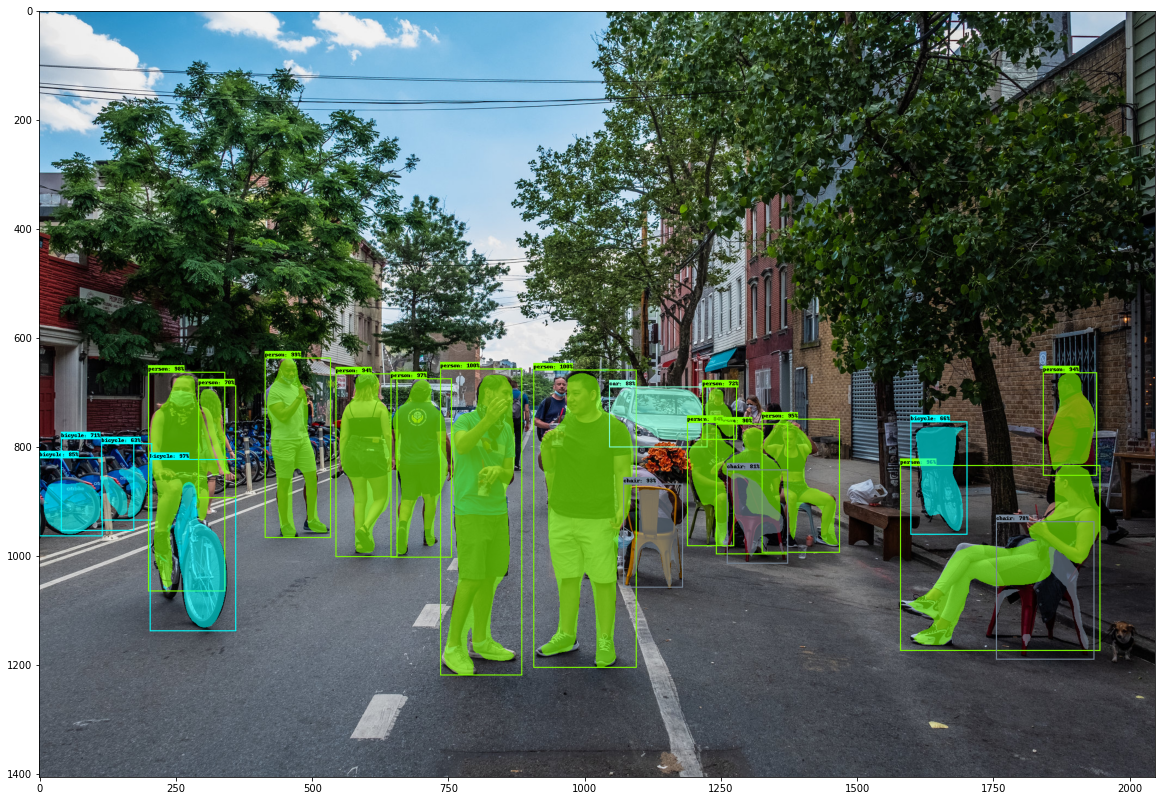

In [55]:
# overlay bounding boxes and its label on the image
viz_utils.visualize_boxes_and_labels_on_image_array(
      img_numpy[0],
      detector_output['detection_boxes'][0].numpy(),
      detector_output['detection_classes'][0].numpy().astype(int),
      detector_output['detection_scores'][0].numpy(),
      category_index,
      instance_masks= detection_masks_reframed.numpy(),
      use_normalized_coordinates=True,
      max_boxes_to_draw=100,
      min_score_thresh=.6,
      line_thickness=2,
      mask_alpha=.6)

# Display the image
plt.figure(figsize=(20,20))
plt.imshow(img_numpy[0])
plt.show()